In [5]:
import numpy as np
import pandas as pd
import os
from pprint import pprint
import sklearn.pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import expon, uniform
from scipy.sparse import spmatrix
import string
import matplotlib.pyplot as plt


In [6]:

def get_all_data_from_dir(dirname: str) -> tuple[list[str], list[str], list[str]]:
    x_train = load_data_from_file(os.path.join(dirname, "x_train.csv"), "text")
    y_train = load_data_from_file(os.path.join(dirname, "y_train.csv"), "is_positive_sentiment")
    x_test = load_data_from_file(os.path.join(dirname, "x_test.csv"), "text")
    return remove_punctuation(x_train), y_train, remove_punctuation(x_test)

def remove_punctuation(strings: list[str]) -> list[str]:
    s1 = [s.translate(str.maketrans('', '', string.punctuation)) for s in strings]
    s2 = [s.lower() for s in s1]
    return s2

def load_data_from_file(filename: str, col: str) -> list[str]:
    csv_data = pd.read_csv(filename)
    # pprint(csv_data)
    list_of_sentences = csv_data[col].values.tolist()
    return list_of_sentences


In [91]:
x, y, x_test = get_all_data_from_dir("data_reviews")
x = np.array(x)
y = np.array(y, dtype=np.int32)
x_test = np.array(x_test)

pipeline = sklearn.pipeline.Pipeline([
    ("bow_feature_extractor", CountVectorizer(ngram_range=(1,1), stop_words="english", strip_accents="ascii")),
    ("classifier", LogisticRegression(max_iter=2000)),
])

distributions = {
    "classifier__C": np.logspace(-10, 10, 10), 
    # "bow_feature_extractor__min_df": np.linspace(0, 10, 5), 
    "bow_feature_extractor__max_df": np.linspace(0.0, 1.0, 20)
}

clf = GridSearchCV(pipeline, distributions, return_train_score=True, verbose=1, n_jobs=-1, cv=5, scoring=lambda e, x, y: roc_auc_score(y, e.predict(x)))

clf.fit(x, y)

yhat_test = clf.predict_proba(x_test)[:,1]
# with open("yproba1_test.txt", "w") as f:
#     f.writelines([f"{str(v)}\n" for v in yhat_test])


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/liamstrand/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/liamstrand/micromamba/envs/cs135_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [92]:
pd.DataFrame(clf.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bow_feature_extractor__max_df,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016438,0.001707,0.000000,0.000000,0.0,0.0,"{'bow_feature_extractor__max_df': 0.0, 'classi...",NaN,NaN,NaN,...,NaN,NaN,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.019672,0.007986,0.000000,0.000000,0.0,0.0,"{'bow_feature_extractor__max_df': 0.0, 'classi...",NaN,NaN,NaN,...,NaN,NaN,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.023270,0.007047,0.000000,0.000000,0.0,0.000003,"{'bow_feature_extractor__max_df': 0.0, 'classi...",NaN,NaN,NaN,...,NaN,NaN,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.015705,0.002485,0.000000,0.000000,0.0,0.000464,"{'bow_feature_extractor__max_df': 0.0, 'classi...",NaN,NaN,NaN,...,NaN,NaN,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.016812,0.004300,0.000000,0.000000,0.0,0.077426,"{'bow_feature_extractor__max_df': 0.0, 'classi...",NaN,NaN,NaN,...,NaN,NaN,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.046806,0.004774,0.002994,0.000192,1.0,12.915497,"{'bow_feature_extractor__max_df': 1.0, 'classi...",0.804167,0.787500,0.747917,...,0.775417,0.024770,1,0.991146,0.992188,0.992708,0.992708,0.989583,0.991667,0.001188
196,0.162480,0.012257,0.004185,0.002447,1.0,2154.43469,"{'bow_feature_extractor__max_df': 1.0, 'classi...",0.725000,0.775000,0.743750,...,0.746667,0.016383,127,0.993750,0.995312,0.995833,0.996354,0.995312,0.995313,0.000872
197,0.742768,0.071042,0.002972,0.000146,1.0,359381.36638,"{'bow_feature_extractor__max_df': 1.0, 'classi...",0.714583,0.758333,0.712500,...,0.729583,0.016478,147,0.993750,0.995833,0.995833,0.996875,0.995833,0.995625,0.001021
198,0.284343,0.059376,0.004495,0.002971,1.0,59948425.031894,"{'bow_feature_extractor__max_df': 1.0, 'classi...",0.747917,0.764583,0.745833,...,0.751667,0.006770,91,0.993750,0.995833,0.995833,0.996875,0.995312,0.995521,0.001021


In [42]:
type(clf.cv_results_["param_classifier__C"])


numpy.ma.core.MaskedArray

array([-2., -1.,  0.,  1.,  2., -2., -1.,  0.,  1.,  2., -2., -1.,  0.,
        1.,  2., -2., -1.,  0.,  1.,  2., -2., -1.,  0.,  1.,  2., -2.,
       -1.,  0.,  1.,  2., -2., -1.,  0.,  1.,  2., -2., -1.,  0.,  1.,
        2., -2., -1.,  0.,  1.,  2., -2., -1.,  0.,  1.,  2., -2., -1.,
        0.,  1.,  2., -2., -1.,  0.,  1.,  2., -2., -1.,  0.,  1.,  2.,
       -2., -1.,  0.,  1.,  2., -2., -1.,  0.,  1.,  2., -2., -1.,  0.,
        1.,  2., -2., -1.,  0.,  1.,  2., -2., -1.,  0.,  1.,  2., -2.,
       -1.,  0.,  1.,  2., -2., -1.,  0.,  1.,  2., -2., -1.,  0.,  1.,
        2.])

float64
float64
float64


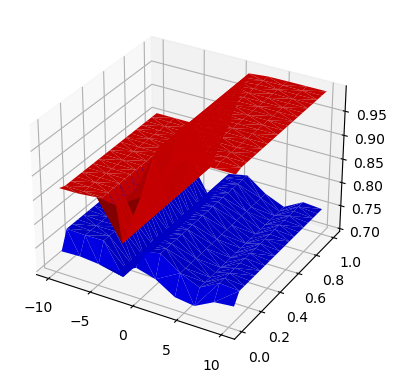

In [96]:
# https://matplotlib.org/stable/gallery/mplot3d/wire3d.html#sphx-glr-gallery-mplot3d-wire3d-py

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121, projection='3d') 
#ax2 = fig.add_subplot((1, 2, 2), projection='3d')

# X is C values
# Y is max_df values
# Z is scores: either mean_test_score or mean_train_score
x_axis = np.log10(np.asarray(clf.cv_results_["param_classifier__C"], dtype=np.float64))
y_axis = np.asarray(clf.cv_results_["param_bow_feature_extractor__max_df"], dtype=np.float64)

width = depth = 1
bottom = np.zeros_like(clf.cv_results_["mean_test_score"])

# grida, gridb = np.meshgrid(x_axis, y_axis)

# print(grida)
# print(gridb)

# Grab some test data.
# X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
# ax1.plot_wireframe([X], [Y, Z, rstride=10, cstride=10)

z_axis_1 = np.asarray(clf.cv_results_["mean_test_score"], dtype=np.float64)
z_axis_2 = np.asarray(clf.cv_results_["mean_train_score"], dtype=np.float64)

print(x_axis.dtype)
print(y_axis.dtype)
print(z_axis_1.dtype)

ax1.plot_trisurf(x_axis, y_axis, z_axis_1, color="blue")
ax1.plot_trisurf(x_axis, y_axis, z_axis_2, color="red")
# ax1.bar3d(x_axis, y_axis, bottom, 0.5, 0.5, clf.cv_results_["mean_train_score"], shade=True, color="red", alpha=0.1)
# ax1.set_title('Train and Validation scores vs ')



